# Morgolophic edge extraction
It is possible to extract the edges of an image using only morgological operations. In this example, the edges of a set of coins in an image will be extracted.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import coins
from skimage.filters import threshold_otsu

from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing

1. Open the image and apply thresholding to extract a binary image.

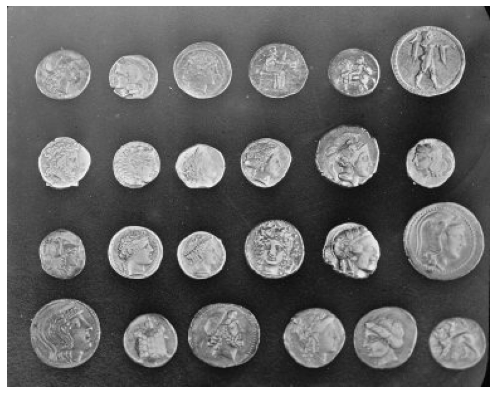

In [ ]:
image = coins()
binary_image = (image > threshold_otsu(image)).astype("int")
plt.figure(figsize=(10, 7))
plt.axis("off")
plt.imshow(image, cmap="gray")
plt.savefig("coins_original.png", dpi=300)

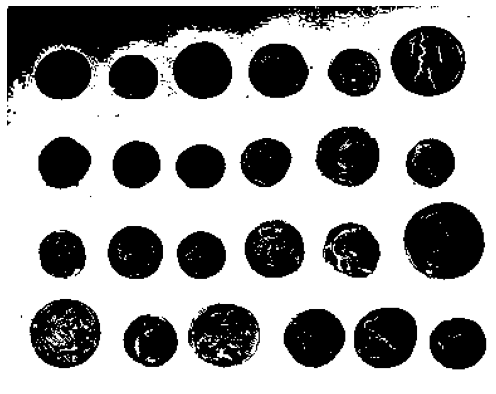

In [ ]:
plt.figure(figsize=(10, 7))
plt.axis("off")
plt.imshow(binary_image, cmap="binary")
plt.savefig("coins_binary.png", dpi=300)

2. Apply erosion to the image.

We need to define our structural element. We will use the cross.

In [ ]:
S = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
])

So, we apply erosion on our set of points

In [ ]:
eroded_coins = binary_erosion(binary_image, structure=S).astype("int")

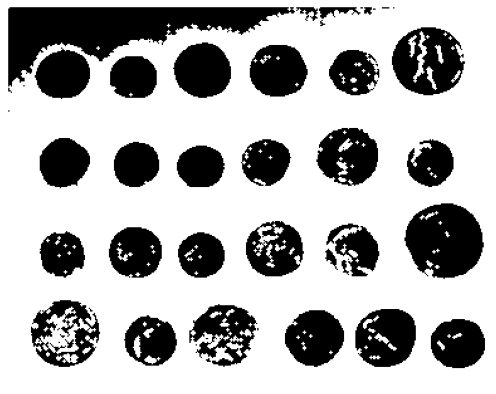

In [ ]:
plt.figure(figsize=(10, 7))
plt.axis("off")
plt.imshow(eroded_coins, cmap="binary")
plt.savefig("coins_eroded.png", dpi=300)

3. Apply set difference

As the eroded image is slightly smaller (approximately 1 pixel) the difference will contain the pixel reduced by the erosion.

In [ ]:
coin_borders = binary_image - eroded_coins

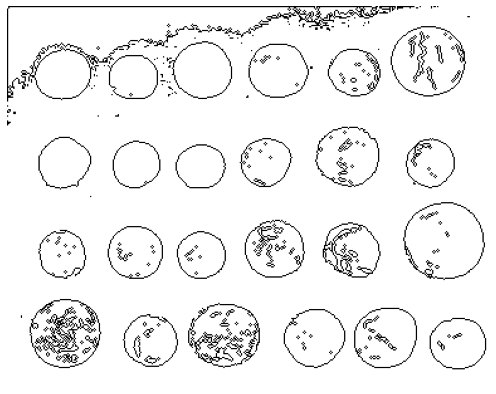

In [ ]:
plt.figure(figsize=(10, 7))
plt.axis("off")
plt.imshow(coin_borders, cmap="binary")
plt.savefig("coins_border.png", dpi=300)